In [1]:
# Vamos importar algumas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/content/Life Expectancy Brazil.xlsx') 

df.head

<bound method NDFrame.head of       País   Ano  Expectativa de vida (em anos)
0   Brasil  1960                      54.205463
1   Brasil  1961                      54.718707
2   Brasil  1962                      55.235659
3   Brasil  1963                      55.751390
4   Brasil  1964                      56.262951
5   Brasil  1965                      56.767366
6   Brasil  1966                      57.265683
7   Brasil  1967                      57.757927
8   Brasil  1968                      58.240683
9   Brasil  1969                      58.708024
10  Brasil  1970                      59.150585
11  Brasil  1971                      59.558000
12  Brasil  1972                      59.924805
13  Brasil  1973                      60.251512
14  Brasil  1974                      60.541098
15  Brasil  1975                      60.800512
16  Brasil  1976                      61.039122
17  Brasil  1977                      61.270829
18  Brasil  1978                      61.506463
19  Brasil

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   País                           56 non-null     object 
 1   Ano                            56 non-null     int64  
 2   Expectativa de vida (em anos)  56 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [ ]:
df

,País,Ano,Expectativa de vida (em anos)
0,Brasil,1960,54.205463
1,Brasil,1961,54.718707
2,Brasil,1962,55.235659
3,Brasil,1963,55.751390
4,Brasil,1964,56.262951
5,Brasil,1965,56.767366
6,Brasil,1966,57.265683
7,Brasil,1967,57.757927
8,Brasil,1968,58.240683
9,Brasil,1969,58.708024


In [ ]:

df.describe()

,Ano,Expectativa de vida (em anos)
count,56.000000,56.000000
mean,1987.500000,64.983395
std,16.309506,6.011508
min,1960.000000,54.205463
25%,1973.750000,60.468701
50%,1987.500000,64.422024
75%,2001.250000,70.556018
max,2015.000000,74.675878


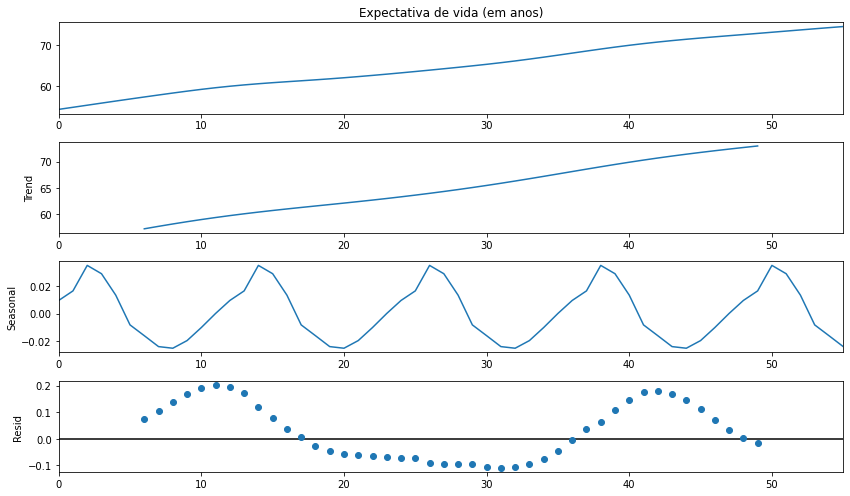

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Expectativa de vida (em anos)'], period=12)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((12, 7))
plt.tight_layout();

Text(0, 0.5, 'Expectativa de vida (em anos)')

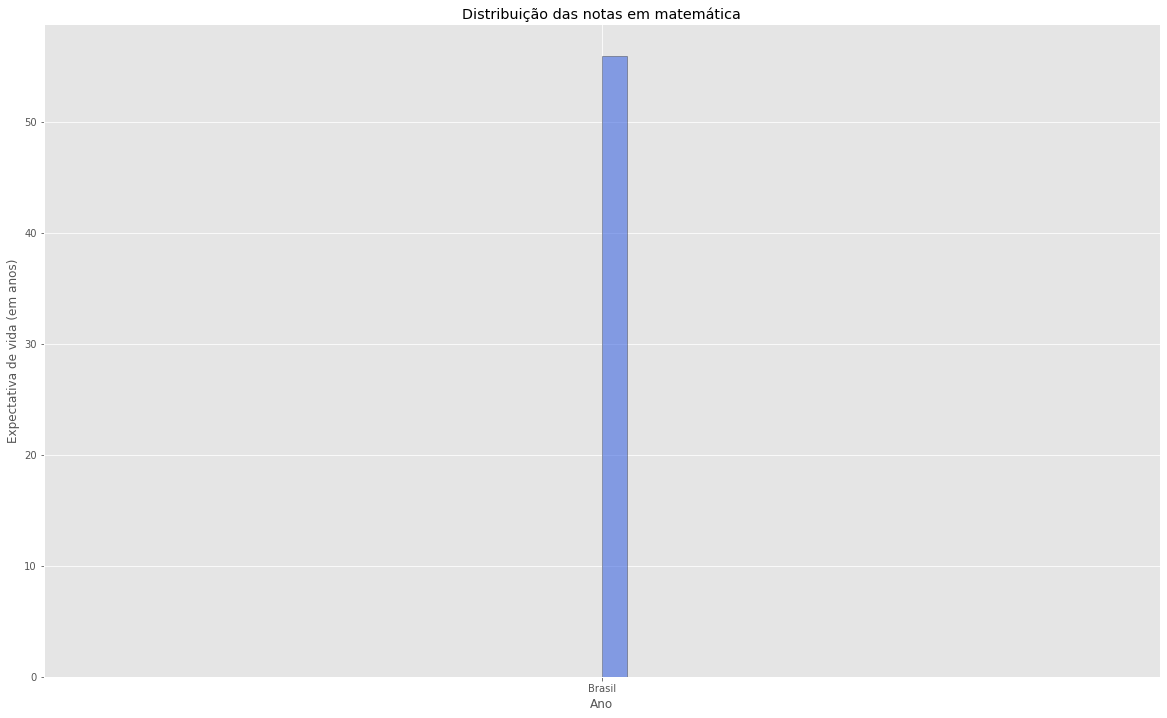

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["País"].hist(bins = 40, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição das notas em matemática")
plt.xlabel("Ano")
plt.ylabel("Expectativa de vida (em anos)")

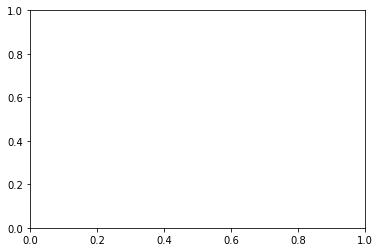

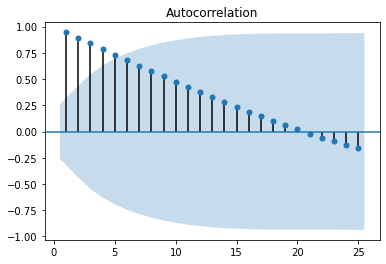

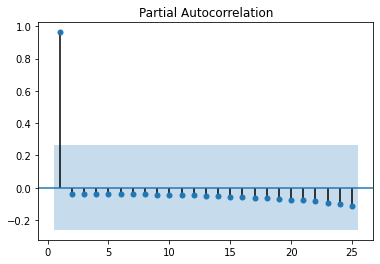

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df['Ano'], lags=25, zero=False);
plot_pacf(df['Ano'], lags=25, zero=False);

In [ ]:
# Vamos importar nosso arquivo csv novamente, mas agora usando o parâmetro 
#parse_dates que transforma nosso recurso Month em um datetime.
# Precisamos usar o parâmetro 'squeeze' como True para importar nossos dados como uma série de pandas
df1 = pd.read_excel('/content/Life Expectancy Brazil.xlsx', parse_dates =['Ano'],index_col=0, squeeze=True) 

# Veja agora o recurso 'Month' é do tipo datetime
df1.head()

,Ano,Expectativa de vida (em anos)
País,,
Brasil,1960-01-01,54.205463
Brasil,1961-01-01,54.718707
Brasil,1962-01-01,55.235659
Brasil,1963-01-01,55.751390
Brasil,1964-01-01,56.262951


In [ ]:
df1.dtypes

Ano                              datetime64[ns]
Expectativa de vida (em anos)           float64
dtype: object